[View in Colaboratory](https://colab.research.google.com/github/taisuke0812/titanic/blob/master/titanic.ipynb)

In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
import pandas as pd
import numpy as np
import pandas as pd
import time
#train

start = time.time()

train = pd.read_csv("train.csv")

train["Sex"] = train["Sex"][:].replace("male",1)
train["Sex"] = train["Sex"][:].replace("female",0)

train["Embarked"] = train["Embarked"][:].replace("S",2)
train["Embarked"] = train["Embarked"][:].replace("Q",1)
train["Embarked"] = train["Embarked"][:].replace("C",0)

train = train.drop("Cabin",axis = 1)
train = train.drop("Name",axis = 1)
train = train.drop("Ticket",axis = 1)
train = train.drop("PassengerId",axis = 1)
train = train.fillna(train["Fare"].mean())
train = train.fillna(train["Age"].mean())

train_X = np.array(train.drop("Survived",axis = 1))
train_y = np.array(train["Survived"])


#test
test = pd.read_csv("test.csv")

df = test[:]
PassengerId = test["PassengerId"][:]

test["Sex"] = test["Sex"][:].replace("male",1)
test["Sex"] = test["Sex"][:].replace("female",0)

test["Embarked"] = test["Embarked"][:].replace("S",2)
test["Embarked"] = test["Embarked"][:].replace("Q",1)
test["Embarked"] = test["Embarked"][:].replace("C",0)

test = test.drop("Cabin",axis = 1)
test = test.drop("Name",axis = 1)
test = test.drop("Ticket",axis = 1)
test = test.drop("PassengerId",axis=1)
test = test.fillna(test["Fare"].mean())
test = test.fillna(test["Age"].mean())

test_X = test[:]

model = Sequential()

model.add(Dense(512,input_dim = 7,activation = "sigmoid"))
model.add(Dense(1024,activation = "sigmoid"))

model.add(Dense(256,activation = "sigmoid"))
model.add(Dense(128,activation = "sigmoid"))
model.add(Dense(64,activation = "sigmoid"))
model.add(Dense(32,activation = "sigmoid"))
model.add(Dense(16,activation = "sigmoid"))
model.add(Dense(8,activation = "sigmoid"))
model.add(Dense(4,activation = "sigmoid"))
model.add(Dropout(0.1))
model.add(Dense(2,activation = "sigmoid"))
model.add(Dense(1,activation = "sigmoid"))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(train_X,train_y, nb_epoch=30, batch_size=15)


scores = model.evaluate(train_X, train_y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))
predict = model.predict(test_X)
predictions = np.round(np.array(predict))
predictions = np.ravel(predictions)



#print(predictions)

#StackingSubmission = pd.DataFrame({ 'PassengerId': PassengerId,'Survived': predictions })
#StackingSubmission.to_csv("StackingSubmission.csv", index=False)

df["Survived"] = predictions

df[["PassengerId","Survived"]].to_csv("submission.csv",index=False)

end_time = time.time() - start
print(end_time)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/30
891/891 [==============================] - 3s 4ms/step - loss: 0.6706 - acc: 0.6162
Epoch 2/30
891/891 [==============================] - 1s 1ms/step - loss: 0.6684 - acc: 0.6162
Epoch 3/30
891/891 [==============================] - 1s 1ms/step - loss: 0.6668 - acc: 0.6162
Epoch 4/30
891/891 [==============================] - 1s 1ms/step - loss: 0.6670 - acc: 0.6162
Epoch 5/30
891/891 [==============================] - 1s 1ms/step - loss: 0.6669 - acc: 0.6162
Epoch 6/30
891/891 [==============================] - 1s 1ms/step - loss: 0.6661 - acc: 0.6162
Epoch 7/30
891/891 [==============================] - 1s 1ms/step - loss: 0.6666 - acc: 0.6162
Epoch 8/30
891/891 [==============================] - 1s 1ms/step - loss: 0.6662 - acc: 0.6162
Epoch 9/30
891/891 [==============================] - 1s 1ms/step - loss: 0.6660 - acc: 0.6162
Epoch 10/30
891/891 [==============================] - 1s 1ms/step - loss: 0.6666 - acc: 0.6162
Epoch 11/30
891/891 [============================

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
import pandas as pd
import numpy as np
import pandas as pd
import time
from scipy import stats
#train

start = time.time()

train = pd.read_csv("train.csv")

train["Sex"] = train["Sex"][:].replace("male",1)
train["Sex"] = train["Sex"][:].replace("female",0)

train["Embarked"] = train["Embarked"][:].replace("S",2)
train["Embarked"] = train["Embarked"][:].replace("Q",1)
train["Embarked"] = train["Embarked"][:].replace("C",0)

train = train.drop("Cabin",axis = 1)
train = train.drop("Name",axis = 1)
train = train.drop("Ticket",axis = 1)
train = train.drop("PassengerId",axis = 1)
train = train.fillna(train["Fare"].mean())
train = train.fillna(train["Age"].mean())
train["Fare"] = stats.zscore(train["Fare"])

train_X = np.array(train.drop("Survived",axis = 1))
train_y = np.array(train["Survived"])


#test
test = pd.read_csv("test.csv")

df = test[:]
PassengerId = test["PassengerId"][:]

test["Sex"] = test["Sex"][:].replace("male",1)
test["Sex"] = test["Sex"][:].replace("female",0)

test["Embarked"] = test["Embarked"][:].replace("S",2)
test["Embarked"] = test["Embarked"][:].replace("Q",1)
test["Embarked"] = test["Embarked"][:].replace("C",0)

test = test.drop("Cabin",axis = 1)
test = test.drop("Name",axis = 1)
test = test.drop("Ticket",axis = 1)
test = test.drop("PassengerId",axis=1)
test = test.fillna(test["Fare"].mean())
test = test.fillna(test["Age"].mean())
test["Fare"] = stats.zscore(test["Fare"])
test_X = test[:]
model = Sequential()
#今のところベスト

model.add(Dense(600,input_dim = 7,activation = "sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(256,activation = "sigmoid"))
model.add(Dense(2,activation = "sigmoid"))
model.add(Dense(10,activation = "sigmoid"))
model.add(Dense(3,activation = "softmax"))
model.add(Dropout(0.2))
model.add(Dense(1,activation = "sigmoid"))#
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(train_X,train_y, nb_epoch=250, batch_size=10)


scores = model.evaluate(train_X, train_y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))
predict = model.predict(test_X)
predictions = np.round(np.array(predict))
predictions = np.ravel(predictions)



#print(predictions)

#StackingSubmission = pd.DataFrame({ 'PassengerId': PassengerId,'Survived': predictions })
#StackingSubmission.to_csv("StackingSubmission.csv", index=False)

df["Survived"] = predictions

df[["PassengerId","Survived"]].to_csv("submission.csv",index=False)

end_time = time.time() - start
print(end_time)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/250
891/891 [==============================] - 2s 2ms/step - loss: 0.6922 - acc: 0.5421
Epoch 2/250
891/891 [==============================] - 1s 589us/step - loss: 0.6911 - acc: 0.5533
Epoch 3/250
891/891 [==============================] - 1s 572us/step - loss: 0.6816 - acc: 0.5600
Epoch 4/250
891/891 [==============================] - 1s 572us/step - loss: 0.6787 - acc: 0.5724
Epoch 5/250
891/891 [==============================] - 1s 600us/step - loss: 0.6825 - acc: 0.5589
Epoch 6/250
891/891 [==============================] - 1s 606us/step - loss: 0.6726 - acc: 0.5937
Epoch 7/250
891/891 [==============================] - 1s 617us/step - loss: 0.6726 - acc: 0.5780
Epoch 8/250
891/891 [==============================] - 1s 620us/step - loss: 0.6728 - acc: 0.5859
Epoch 9/250
891/891 [==============================] - 1s 621us/step - loss: 0.6677 - acc: 0.5892
Epoch 10/250
891/891 [==============================] - 1s 658us/step - loss: 0.6597 - acc: 0.5769
Epoch 11/250
891/891 

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
import pandas as pd
import numpy as np
import pandas as pd
import time
#train

start = time.time()

train = pd.read_csv("train.csv")

train["Sex"] = train["Sex"][:].replace("male",1)
train["Sex"] = train["Sex"][:].replace("female",0)

train["Embarked"] = train["Embarked"][:].replace("S",2)
train["Embarked"] = train["Embarked"][:].replace("Q",1)
train["Embarked"] = train["Embarked"][:].replace("C",0)

train = train.drop("Cabin",axis = 1)
train = train.drop("Name",axis = 1)
train = train.drop("Ticket",axis = 1)
train = train.drop("PassengerId",axis = 1)
train = train.fillna(train["Fare"].mean())
train = train.fillna(train["Age"].mean())

train_X = np.array(train.drop("Survived",axis = 1))
train_y = np.array(train["Survived"])


#test
test = pd.read_csv("test.csv")

df = test[:]
PassengerId = test["PassengerId"][:]

test["Sex"] = test["Sex"][:].replace("male",1)
test["Sex"] = test["Sex"][:].replace("female",0)

test["Embarked"] = test["Embarked"][:].replace("S",2)
test["Embarked"] = test["Embarked"][:].replace("Q",1)
test["Embarked"] = test["Embarked"][:].replace("C",0)

test = test.drop("Cabin",axis = 1)
test = test.drop("Name",axis = 1)
test = test.drop("Ticket",axis = 1)
test = test.drop("PassengerId",axis=1)
test = test.fillna(test["Fare"].mean())
test = test.fillna(test["Age"].mean())

test_X = test[:]

model = Sequential()

model.add(Dense(512,input_dim = 7,activation = "sigmoid"))
model.add(Dense(300,activation = "sigmoid"))
model.add(Dense(1,activation = "sigmoid"))#
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(train_X,train_y, nb_epoch=30, batch_size=10)


scores = model.evaluate(train_X, train_y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))
predict = model.predict(test_X)
predictions = np.round(np.array(predict))
predictions = np.ravel(predictions)



#print(predictions)

#StackingSubmission = pd.DataFrame({ 'PassengerId': PassengerId,'Survived': predictions })
#StackingSubmission.to_csv("StackingSubmission.csv", index=False)

df["Survived"] = predictions

df[["PassengerId","Survived"]].to_csv("submission.csv",index=False)

end_time = time.time() - start
print(end_time)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/30
891/891 [==============================] - 1s 1ms/step - loss: 0.6347 - acc: 0.6510
Epoch 2/30
891/891 [==============================] - 0s 510us/step - loss: 0.6123 - acc: 0.6824
Epoch 3/30
891/891 [==============================] - 1s 605us/step - loss: 0.6077 - acc: 0.6925
Epoch 4/30
891/891 [==============================] - 0s 459us/step - loss: 0.5669 - acc: 0.7194
Epoch 5/30
891/891 [==============================] - 0s 447us/step - loss: 0.5201 - acc: 0.7699
Epoch 6/30
891/891 [==============================] - 0s 445us/step - loss: 0.5124 - acc: 0.7722
Epoch 7/30
891/891 [==============================] - 0s 449us/step - loss: 0.4910 - acc: 0.7688
Epoch 8/30
891/891 [==============================] - 0s 478us/step - loss: 0.4821 - acc: 0.7699
Epoch 9/30
891/891 [==============================] - 0s 449us/step - loss: 0.4690 - acc: 0.7957
Epoch 10/30
891/891 [==============================] - 0s 456us/step - loss: 0.4586 - acc: 0.7699
Epoch 11/30
891/891 [==========

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
import pandas as pd
import numpy as np
import pandas as pd
import time
from scipy import stats
#train

start = time.time()

train = pd.read_csv("train.csv")

train["Sex"] = train["Sex"][:].replace("male",1)
train["Sex"] = train["Sex"][:].replace("female",0)

train["Embarked"] = train["Embarked"][:].replace("S",2)
train["Embarked"] = train["Embarked"][:].replace("Q",1)
train["Embarked"] = train["Embarked"][:].replace("C",0)

train = train.drop("Cabin",axis = 1)
train = train.drop("Name",axis = 1)
train = train.drop("Ticket",axis = 1)
train = train.drop("PassengerId",axis = 1)
train = train.fillna(train["Fare"].mean())
train = train.fillna(train["Age"].mean())

train_X = np.array(train.drop("Survived",axis = 1))
train_y = np.array(train["Survived"])


#test
test = pd.read_csv("test.csv")

df = test[:]
PassengerId = test["PassengerId"][:]

test["Sex"] = test["Sex"][:].replace("male",1)
test["Sex"] = test["Sex"][:].replace("female",0)

test["Embarked"] = test["Embarked"][:].replace("S",2)
test["Embarked"] = test["Embarked"][:].replace("Q",1)
test["Embarked"] = test["Embarked"][:].replace("C",0)

test = test.drop("Cabin",axis = 1)
test = test.drop("Name",axis = 1)
test = test.drop("Ticket",axis = 1)
test = test.drop("PassengerId",axis=1)
test = test.fillna(test["Fare"].mean())
test = test.fillna(test["Age"].mean())

test_X = test[:]

train["Fare"] = stats.zcore(train["Fare"])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,-0.502445,2.0
1,1,1,0,38.000000,1,0,0.786845,0.0
2,1,3,0,26.000000,0,0,-0.488854,2.0
3,1,1,0,35.000000,1,0,0.420730,2.0
4,0,3,1,35.000000,0,0,-0.486337,2.0
5,0,3,1,32.204208,0,0,-0.478116,1.0
6,0,1,1,54.000000,0,0,0.395814,2.0
7,0,3,1,2.000000,3,1,-0.224083,2.0
8,1,3,0,27.000000,0,2,-0.424256,2.0
9,1,2,0,14.000000,1,0,-0.042956,0.0


0.16056013107299805


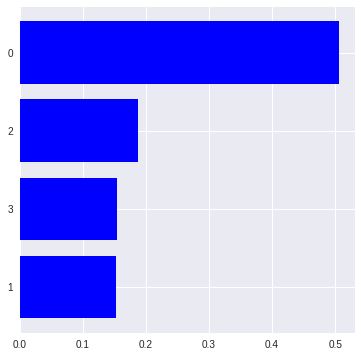

,Survived,Pclass,SibSp,Parch,Embarked
0,0,3,1,0,2.0
1,1,1,1,0,0.0
2,1,3,0,0,2.0
3,1,1,1,0,2.0
4,0,3,0,0,2.0
5,0,3,0,0,1.0
6,0,1,0,0,2.0
7,0,3,3,1,2.0
8,1,3,0,2,2.0
9,1,2,1,0,0.0


In [13]:
#RandomForest


import keras
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
import pandas as pd
import numpy as np
import pandas as pd
import time

from sklearn.tree import DecisionTreeClassifier
#train

start = time.time()

train = pd.read_csv("train.csv")

train["Sex"] = train["Sex"][:].replace("male",1)
train["Sex"] = train["Sex"][:].replace("female",0)

train["Embarked"] = train["Embarked"][:].replace("S",2)
train["Embarked"] = train["Embarked"][:].replace("Q",1)
train["Embarked"] = train["Embarked"][:].replace("C",0)

train = train.drop("Cabin",axis = 1)
train = train.drop("Name",axis = 1)
train = train.drop("Ticket",axis = 1)
train = train.drop("PassengerId",axis = 1)

train = train.fillna(train["Fare"].mean())
train = train.fillna(train["Age"].mean())

train = train.drop("Fare",axis=1)
train = train.drop("Age",axis=1)

train = train.drop("Sex",axis=1)
train_X = np.array(train.drop("Survived",axis = 1))
train_y = np.array(train["Survived"])


#test
test = pd.read_csv("test.csv")

df = test[:]
PassengerId = test["PassengerId"][:]

test["Sex"] = test["Sex"][:].replace("male",1)
test["Sex"] = test["Sex"][:].replace("female",0)

test["Embarked"] = test["Embarked"][:].replace("S",2)
test["Embarked"] = test["Embarked"][:].replace("Q",1)
test["Embarked"] = test["Embarked"][:].replace("C",0)

test = test.drop("Cabin",axis = 1)
test = test.drop("Name",axis = 1)
test = test.drop("Ticket",axis = 1)
test = test.drop("PassengerId",axis=1)

test = test.fillna(test["Fare"].mean())
test = test.fillna(test["Age"].mean())


test = test.drop("Fare",axis=1)
test = test.drop("Age",axis=1)
test = test.drop("Sex",axis=1)

test_X = test[:]



#model



clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(train_X, train_y)
predictions = clf.predict(test_X)




#model











df["Survived"] = predictions

df[["PassengerId","Survived"]].to_csv("submissionRandomForest.csv",index=False)

end_time = time.time() - start
print(end_time)




import matplotlib.pyplot as plt
%matplotlib inline

features = pd.DataFrame(train_X).columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,6))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()


train

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout,LSTM
import pandas as pd
import numpy as np
import pandas as pd
import time
from scipy import stats
#train

start = time.time()

train = pd.read_csv("train.csv")

train["Sex"] = train["Sex"][:].replace("male",1)
train["Sex"] = train["Sex"][:].replace("female",0)

train["Embarked"] = train["Embarked"][:].replace("S",2)
train["Embarked"] = train["Embarked"][:].replace("Q",1)
train["Embarked"] = train["Embarked"][:].replace("C",0)

train = train.drop("Cabin",axis = 1)
train = train.drop("Name",axis = 1)
train = train.drop("Ticket",axis = 1)
train = train.drop("PassengerId",axis = 1)
train = train.fillna(train["Fare"].mean())
train = train.fillna(train["Age"].mean())
train["Fare"] = stats.zscore(train["Fare"])

train_X = np.array(train.drop("Survived",axis = 1))
train_y = np.array(train["Survived"])


#test
test = pd.read_csv("test.csv")

df = test[:]
PassengerId = test["PassengerId"][:]

test["Sex"] = test["Sex"][:].replace("male",1)
test["Sex"] = test["Sex"][:].replace("female",0)

test["Embarked"] = test["Embarked"][:].replace("S",2)
test["Embarked"] = test["Embarked"][:].replace("Q",1)
test["Embarked"] = test["Embarked"][:].replace("C",0)

test = test.drop("Cabin",axis = 1)
test = test.drop("Name",axis = 1)
test = test.drop("Ticket",axis = 1)
test = test.drop("PassengerId",axis=1)
test = test.fillna(test["Fare"].mean())
test = test.fillna(test["Age"].mean())
test["Fare"] = stats.zscore(test["Fare"])
test_X = test[:]
model = Sequential()
#今のところベスト

model.add(Dense(64,input_dim = 7,activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(train_X,train_y, nb_epoch=300, batch_size=128)


scores = model.evaluate(train_X, train_y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))
predict = model.predict(test_X)
predictions = np.round(np.array(predict))
predictions = np.ravel(predictions)



#print(predictions)

#StackingSubmission = pd.DataFrame({ 'PassengerId': PassengerId,'Survived': predictions })
#StackingSubmission.to_csv("StackingSubmission.csv", index=False)

df["Survived"] = predictions

df[["PassengerId","Survived"]].to_csv("submission_common.csv",index=False)

end_time = time.time() - start
print(end_time)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/300
891/891 [==============================] - 0s 467us/step - loss: 2.4666 - acc: 0.4927
Epoch 2/300
891/891 [==============================] - 0s 24us/step - loss: 1.8910 - acc: 0.5264
Epoch 3/300
891/891 [==============================] - 0s 21us/step - loss: 1.6527 - acc: 0.5466
Epoch 4/300
891/891 [==============================] - 0s 24us/step - loss: 1.5715 - acc: 0.5398
Epoch 5/300
891/891 [==============================] - 0s 21us/step - loss: 1.3980 - acc: 0.5455
Epoch 6/300
891/891 [==============================] - 0s 23us/step - loss: 1.2954 - acc: 0.5275
Epoch 7/300
891/891 [==============================] - 0s 23us/step - loss: 1.1555 - acc: 0.5511
Epoch 8/300
891/891 [==============================] - 0s 24us/step - loss: 1.0619 - acc: 0.5982
Epoch 9/300
891/891 [==============================] - 0s 22us/step - loss: 1.0409 - acc: 0.5421
Epoch 10/300
891/891 [==============================] - 0s 23us/step - loss: 0.9173 - acc: 0.5814
Epoch 11/300
891/891 [======

In [27]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout,LSTM
import pandas as pd
import numpy as np
import pandas as pd
import time
from scipy import stats
#train

start = time.time()

train = pd.read_csv("train.csv")

train["Sex"] = train["Sex"][:].replace("male",1)
train["Sex"] = train["Sex"][:].replace("female",0)

train["Embarked"] = train["Embarked"][:].replace("S",2)
train["Embarked"] = train["Embarked"][:].replace("Q",1)
train["Embarked"] = train["Embarked"][:].replace("C",0)

train = train.drop("Cabin",axis = 1)
train = train.drop("Name",axis = 1)
train = train.drop("Ticket",axis = 1)
train = train.drop("PassengerId",axis = 1)
train = train.fillna(train["Fare"].mean())
train = train.fillna(train["Age"].mean())
train["Fare"] = stats.zscore(train["Fare"])

train_X = np.array(train.drop("Survived",axis = 1))
train_y = np.array(train["Survived"])


#test
test = pd.read_csv("test.csv")

df = test[:]
PassengerId = test["PassengerId"][:]

test["Sex"] = test["Sex"][:].replace("male",1)
test["Sex"] = test["Sex"][:].replace("female",0)

test["Embarked"] = test["Embarked"][:].replace("S",2)
test["Embarked"] = test["Embarked"][:].replace("Q",1)
test["Embarked"] = test["Embarked"][:].replace("C",0)

test = test.drop("Cabin",axis = 1)
test = test.drop("Name",axis = 1)
test = test.drop("Ticket",axis = 1)
test = test.drop("PassengerId",axis=1)
test = test.fillna(test["Fare"].mean())
test = test.fillna(test["Age"].mean())
test["Fare"] = stats.zscore(test["Fare"])
test_X = test[:]
model = Sequential()
#今のところベスト

model.add(Dense(128,input_dim = 7,activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(train_X,train_y, nb_epoch=300, batch_size=256)


scores = model.evaluate(train_X, train_y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))
predict = model.predict(test_X)
predictions = np.round(np.array(predict))
predictions = np.ravel(predictions)



#print(predictions)

#StackingSubmission = pd.DataFrame({ 'PassengerId': PassengerId,'Survived': predictions })
#StackingSubmission.to_csv("StackingSubmission.csv", index=False)

df["Survived"] = predictions

df[["PassengerId","Survived"]].to_csv("submission_common.csv",index=False)

end_time = time.time() - start
print(end_time)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/300
891/891 [==============================] - 1s 608us/step - loss: 1.8922 - acc: 0.5511
Epoch 2/300
891/891 [==============================] - 0s 27us/step - loss: 1.4622 - acc: 0.5320
Epoch 3/300
891/891 [==============================] - 0s 26us/step - loss: 1.2741 - acc: 0.5623
Epoch 4/300
891/891 [==============================] - 0s 27us/step - loss: 1.2457 - acc: 0.5342
Epoch 5/300
891/891 [==============================] - 0s 29us/step - loss: 1.1275 - acc: 0.5499
Epoch 6/300
891/891 [==============================] - 0s 26us/step - loss: 1.1821 - acc: 0.5297
Epoch 7/300
891/891 [==============================] - 0s 28us/step - loss: 0.9929 - acc: 0.5589
Epoch 8/300
891/891 [==============================] - 0s 26us/step - loss: 1.0063 - acc: 0.5432
Epoch 9/300
891/891 [==============================] - 0s 32us/step - loss: 0.9571 - acc: 0.5544
Epoch 10/300
891/891 [==============================] - 0s 28us/step - loss: 0.8951 - acc: 0.5657
Epoch 11/300
891/891 [======